# Greedy Algorithms

Greedy is an algorithmic paradigm that builds up a solution piece by piece, always choosing the next piece that offers the most obvious and immediate benefit. So the problems where choosing locally optimal also leads to global solution are the best fit for Greedy

i.e., Greedy Algorithms is the problem solving technique where we make the locally optimum choice at each stage & hope to acheive a global optimum

Generally used for optimization problems

* minimum or maximum
* sorting is done
* no fixed rule is applicable | works on Adhoc basis
* not easily realized if applying greedy or not

## Question: Activity Selection

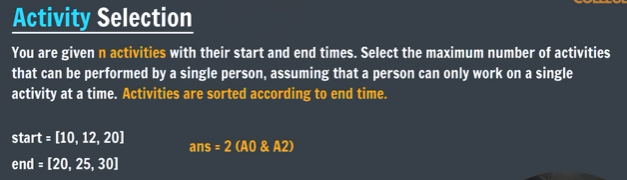

In [ ]:
"""
Approach | start = [1,3,0,5,8,5], end = [2,4,6,7,9,9]

1. activities are sorted on basis of end-time
2. iterate over the end_time 0-n
3. select 1st activity based on end-time, then select the no-overlapping activities, disjoint actv.
4. non-overlapping --> start_time >= end_time of last chosen activity
5. count += 1, acts = [] to sotre activities
"""

In [3]:
def activitySelection(start, end):
    act_list = [] # to store the activities

    ## assuming the first activity is what we will definitly do
    maxAct = 1
    act_list.append(0)
    lastEnd = end[0]

    for i in range(1, len(end)):

        ## non-overlapping condition
        if start[i] >= lastEnd:
            act_list.append(i)
            lastEnd = end[i]
            maxAct += 1
    
    return maxAct, act_list
## TC - O(n)

## end_time is already sorted
start = [1,3,0,5,8,5]
end = [2,4,6,7,9,9]
print(activitySelection(start, end))

(4, [0, 1, 3, 4])


##### Sorting 2-D array or List of a List in python

In [20]:
# start = [1,3,0,5,8,5]
# end =   [2,4,6,7,9,9]  ### sorted on basis of end

start = [0,1,3,5,5,8] ### sorted on basis of start
end =   [6,2,4,7,9,9]

activities = [[] for _ in range(len(end))]
for i in range(len(end)):
    activities[i].append(i)
    activities[i].append(start[i])
    activities[i].append(end[i])

activities

[[0, 0, 6], [1, 1, 2], [2, 3, 4], [3, 5, 7], [4, 5, 9], [5, 8, 9]]

In [21]:
### sorted the activities based on end_time in ascending order
activities.sort(key = lambda x: x[2])

In [22]:
activities

[[1, 1, 2], [2, 3, 4], [0, 0, 6], [3, 5, 7], [4, 5, 9], [5, 8, 9]]

In [26]:
### adding the sorting logic in the function
def activitySelection(start, end):
    activities = [[] for _ in range(len(end))]
    for i in range(len(end)):
        activities[i].append(i)
        activities[i].append(start[i])
        activities[i].append(end[i])
    
    ### sorted the activities based on end_time in ascending order
    activities.sort(key = lambda x: x[2])
    ## 0th index column - index | 1st index column - start | 2nd index column - end

    act_list = [] # to store the activities

    ## assuming the first activity is what we will definitly do
    maxAct = 1
    act_list.append(activities[0][0])
    lastEnd = activities[0][2]

    for i in range(1, len(end)):

        ## non-overlapping condition
        if activities[i][1] >= lastEnd:
            act_list.append(activities[i][0])
            lastEnd = activities[i][2]
            maxAct += 1
    
    return maxAct, act_list
## TC - O(nlogn)

## end_time is already sorted
# start = [1,3,0,5,8,5]
# end = [2,4,6,7,9,9]

start = [0,1,3,5,5,8] ### sorted on basis of start
end =   [6,2,4,7,9,9]

print(activitySelection(start, end))

(4, [1, 2, 3, 5])


## Question: Fractional Knapsack

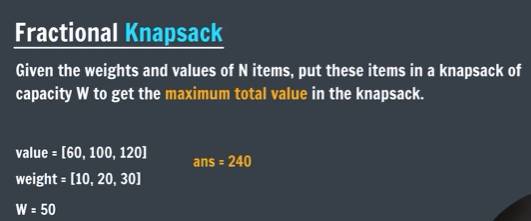

In [39]:
def FractionalKnapsack(value, weight, W):
    ## calculate ratios and store index
    ratio = [[] for _ in range(len(value))]
    for i in range(len(value)):
        ratio[i].append(i)
        ratio[i].append(float(value[i]/weight[i]))

    ## sort ratio in desc
    ratio.sort(reverse=True, key = lambda x: x[1])

    netValue = 0
    weight_in_knapsack = [] ## how mushc weight is put in sack
    value_in_knapsack = [] ## whats the value of each weight in sack

    for i in range(len(value)):
        if W >= weight[i]:
            weight_in_knapsack.append(weight[i])
            value_in_knapsack.append(value[i])
            W = W - weight[i]
            netValue = int(netValue + value[i])
        else:
            weight_in_knapsack.append(W)
            value_in_knapsack.append(int(ratio[i][1] * W))
            netValue = int(netValue + (ratio[i][1] * W))
            break
    return netValue, weight_in_knapsack, value_in_knapsack


value = [60, 100, 120]
weight = [10, 20, 30]
W = 50
netValue, weight_in_knapsack, value_in_knapsack = FractionalKnapsack(value, weight, W)
print("Maximum Value in Knapsack:", netValue)
print("Weights in Knapsack:", weight_in_knapsack)
print("Values in Knapsack:", value_in_knapsack)

Maximum Value in Knapsack: 240
Weights in Knapsack: [10, 20, 20]
Values in Knapsack: [60, 100, 80]


## Question: Minimum Absolute Difference Pairs

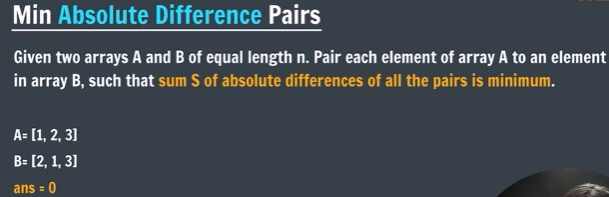

Approach:
1. sort A and B both in ascending order
2. enumerate, iterate over A, 0 - n
3.  

In [45]:
def minAbsDiffPairs(A, B):
    ## sort both A and B
    A.sort()
    B.sort()

    s = 0
    pairs_idx = []
    for i in range(len(A)):
        s = s + abs(A[i] - B[i])
        pairs_idx.append((A[i], B[i]))
    return s, pairs_idx
### TC --> O(nlogn)

# A = [1,2,3]
# B = [2,1,3]

A = [4,1,8,7]
B = [2,3,6,5]
s, pairs_idx = minAbsDiffPairs(A, B)
print("Min Absolute Difference Sum:", s)
print("Abs Difference Pairs:", pairs_idx)

Min Absolute Difference Sum: 6
Abs Difference Pairs: [(1, 2), (4, 3), (7, 5), (8, 6)]


## Question: Max Length Chain of Pairs

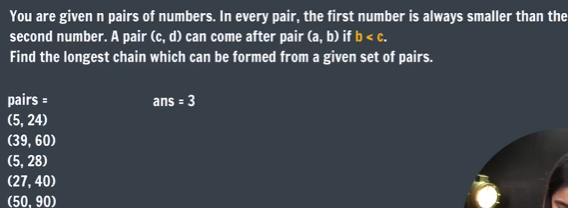

In [48]:
def maxLengthChain(pairs):
    pair_lst = [[] for _ in range(len(pairs))]
    for i in range(len(pairs)):
        pair_lst[i].append(pairs[i])
        pair_lst[i].append(pairs[i][0])  ## start of a pair
        pair_lst[i].append(pairs[i][1])  ## end of a pair
    
    pair_lst.sort(key = lambda x: x[2])

    pairsChain = []
    prevPairEnd = pair_lst[0][2]  ## assuming 1st pair is always done
    pairLen = 1 ## based on a basic assumption
    pairsChain.append(pair_lst[0][0]) ## appending first item in pairChain

    for i in range(1, len(pairs)):
        if pair_lst[i][1] >= prevPairEnd:
            prevPairEnd = pair_lst[i][2]
            pairLen += 1
            pairsChain.append(pair_lst[i][0])
    
    return pairLen, pairsChain
## TC --> O(nlogn)

pairs = [(5,24), (39,60), (5,28), (27,40), (50,90)]
pairLen, pairsChain = maxLengthChain(pairs)
print("Max Pair Length:", pairLen)
print("Pair in Chain of Pairs:", pairsChain)

Max Pair Length: 3
Pair in Chain of Pairs: [(5, 24), (27, 40), (50, 90)]


## India Coins

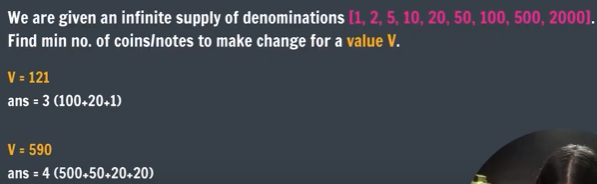

Canonical Coins System | Canonical Number System

Approach:
1. Sort currencies in desc order
2. iterate it the sorted currencies list and break condition until Value becomes 0

In [59]:
def minIndianCoins(value):
    denominations = [1,2,5,10,20,50,100,500,2000]
    denominations.sort(reverse=True)

    currencyVal_list = []
    idx = 0
    minLen = 0
    while value != 0:
        if denominations[idx] <= value:
            minLen += 1
            value -= denominations[idx]
            currencyVal_list.append(denominations[idx])
            idx = 0
        else:
            idx += 1
    
    return minLen, currencyVal_list

value = 4000
minLen, currencyVal_list = minIndianCoins(value)
print("Min no. currency/notes req.:", minLen)
print("Currency/Notes req. to make change:", currencyVal_list)

Min no. currency/notes req.: 2
Currency/Notes req. to make change: [2000, 2000]


## Job Sequencing Problem

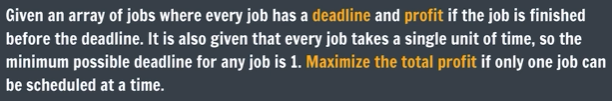
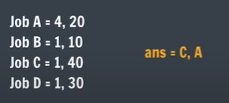

In [69]:
def jobSequencing(jobs):
    ProfitperHour = [[] for _ in range(len(jobs))]
    for i in range(len(jobs)):
        ProfitperHour[i].append(i)
        ProfitperHour[i].append(jobs[i][0])  ## hours
        ProfitperHour[i].append(jobs[i][1])  ## profit
        ProfitperHour[i].append(float(jobs[i][1]/jobs[i][0])) ## profit/hr

    ProfitperHour.sort(reverse = True, key = lambda x: x[3])
    
    job_seq = []
    totalProfit = 0
    
    job_seq.append(jobs[ProfitperHour[0][0]]) ## since the lst is already arrange it makes sense do the highest value task first
    totalProfit = ProfitperHour[0][2]
    prevDeadline = ProfitperHour[0][1]

    for i in range(1, len(jobs)):
        if ProfitperHour[i][1] > prevDeadline:
            totalProfit += ProfitperHour[i][2]
            job_seq.append(jobs[ProfitperHour[i][0]])
    
    return totalProfit, job_seq

jobs = [(4,20), (1,10), (1,40), (1,30)]
totalProfit, job_seq = jobSequencing(jobs)
print("Max Profit:", totalProfit)
print("Jobs done:", job_seq)

Max Profit: 60
Jobs done: [(1, 40), (4, 20)]


## Chocola Problem

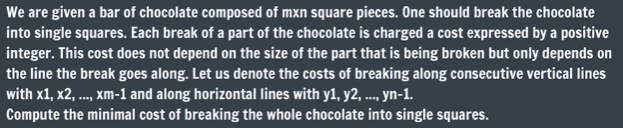
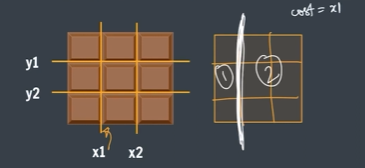

Similar Problems: Min cost to cut board into squares

Approach:
1. 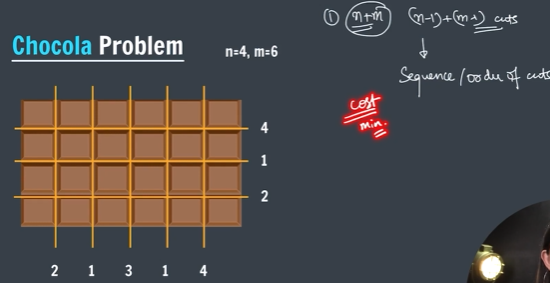
2. Total number of cuts = (n-1) + (m-1) | Total Peices = n * m
3. Cut chocolate/board in such a way that you incur a minimum cost
4. 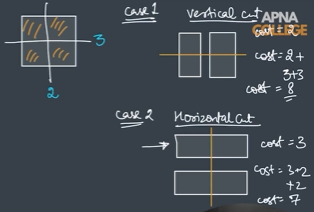
5. After each cut costs increases, always cut with the max cuts

In [90]:
### n - rows/horizontal, m - columns/vertical, horizontal costs, vertical costs
def chocolaProblem(n, m , h_costs, v_costs):
    h_costs_lst = [[] for _ in range(n-1)]  ## len of h_costs = n
    v_costs_lst = [[] for _ in range(m-1)]  ## len of v_costs = m

    for i in range(n-1):
        h_costs_lst[i].append(i)
        h_costs_lst[i].append(h_costs[i])
    
    for j in range(m-1):
        v_costs_lst[j].append(j)
        v_costs_lst[j].append(v_costs[j])
    
    ## sorting in desc order
    h_costs_lst.sort(reverse=True, key=lambda x: x[1])
    v_costs_lst.sort(reverse=True, key=lambda x: x[1])
    print("h_costs_lst:", h_costs_lst)
    print("v_costs_lst:", v_costs_lst)

    cut_idx = []
    minCost = 0
    h,v = 0,0   ## these are pointers
    hp, vp = 1,1 ## these are count of peices
    while (h < len(h_costs)) & (v < len(v_costs)):
        if  h_costs_lst[h][1] >=  v_costs_lst[v][1]: ##horizontal cut
            minCost += h_costs_lst[h][1] * vp
            cut_idx.append('h' + str(h_costs_lst[h][0]))
            hp += 1
            h += 1
            
        elif h_costs_lst[h][1] <  v_costs_lst[v][1]: ## vertical cut
            minCost += v_costs_lst[v][1] * hp
            cut_idx.append('v' + str(v_costs_lst[v][0]))
            vp += 1
            v += 1
            

    while h < len(h_costs):
        minCost += h_costs_lst[h][1] * vp
        cut_idx.append('h' + str(h_costs_lst[h][0]))
        hp += 1
        h += 1

    while v < len(v_costs):
        minCost += v_costs_lst[v][1] * hp
        cut_idx.append('v' + str(v_costs_lst[v][0]))
        vp += 1
        v += 1

    
    return minCost, cut_idx


n = 4
m = 6
h_costs = [4,1,2]
v_costs = [2,1,3,1,4]
minCost, cut_idx = chocolaProblem(n, m , h_costs, v_costs)
print('Min cost to cut a choloate/board:', minCost)
print('Cut made in this order based on the index:', cut_idx)

h_costs_lst: [[0, 4], [2, 2], [1, 1]]
v_costs_lst: [[4, 4], [2, 3], [0, 2], [1, 1], [3, 1]]
Min cost to cut a choloate/board: 42
Cut made in this order based on the index: ['h0', 'v4', 'v2', 'h2', 'v0', 'h1', 'v1', 'v3']
